In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.table import Table

from environments import Gridworld_Lecture, Gridworld_Book
from agents.dynamic_programming import Random_Agent

-----------------------

## Algebraic Solution

Let's consider following system of linear equations:

\begin{align}
v(S_1) &= 0.5 + 0.5*\gamma*v(S_2)\\
v(S_2) &= 0.5*\gamma*v(S_1) + 0.5*\gamma*V(S_3)\\
v(S_3) &= 0.5*\gamma*v(S_2) - 0.5
\end{align}

we can replace $V(S_1)$ with $x$, $V(S_2)$ with $y$ and $V(S_3)$ with $z$ to get following system:

\begin{align}
x &= 0.5 + 0.5*\gamma*y\\
y &= 0.5*\gamma*x + 0.5*\gamma*z\\
z &= 0.5*\gamma*y - 0.5
\end{align}

After some transformations, we get:

\begin{align}
-0.5 &= -1x + 0.5\gamma y + 0z\\
0 &= 0.5\gamma x - 1y + 0.5\gamma z\\
0.5 &= 0x + 0.5\gamma y - 1z
\end{align}

which we can input in the matrix $A$ and vector $b$ to solve the system of linear equations:

$$
A = \begin{pmatrix} -1 & 0.5\gamma & 0 \\ 0.5\gamma & -1 & 0.5\gamma \\ 0 & 0.5\gamma & -1 \end{pmatrix},\ b = \begin{pmatrix} -0.5 \\ 0 \\ 0.5 \end{pmatrix}
$$


In [2]:
# define A and b
gamma = 0.9

A = np.array([[-1, 0.5*gamma, 0],
              [0.5*gamma, -1, 0.5*gamma],
              [0, 0.5*gamma, -1]])

b = np.array([-0.5, 0, 0.5])

print(f'{A}\n\n{b}')

[[-1.    0.45  0.  ]
 [ 0.45 -1.    0.45]
 [ 0.    0.45 -1.  ]]

[-0.5  0.   0.5]


Given the following matrix vector form:

$$
\begin{pmatrix} -1 & 0.5\gamma & 0 \\ 0.5\gamma & -1 & 0.5\gamma \\ 0 & 0.5\gamma & -1 \end{pmatrix} \begin{pmatrix} x \\ y \\ z \end{pmatrix} = \begin{pmatrix} -0.5 \\ 0 \\ 0.5 \end{pmatrix}
$$

we can than find the solution $s$ with the dot product of the inverse of $A$ and the vector $b$:

$$
s = A^{-1}\times b
$$

or simply put use "_np.linalg.solve(A,b)_" which is nothing less and shorter than "_np.linalg.inv(A).dot(b)_".

In [3]:
# solve system of linear equations
# solution = np.linalg.inv(A).dot(b)
solution = np.linalg.solve(A, b)

print(f'{solution}\n\nv(S1) = {solution[0]}\nv(S2) = {solution[1]}\nv(S3) = {solution[2]}')

[ 0.5 -0.  -0.5]

v(S1) = 0.5
v(S2) = -0.0
v(S3) = -0.5


---

## Environments and Random-Agents

In [4]:
# 1D: 1x5 world with terminal-states at (0, 0) and (0, 4)
env_lecture = Gridworld_Lecture()
agent_lecture = Random_Agent(action_space = env_lecture.action_space)

# 2D: 4x4 world with terminal-states at (0, 0) and (3, 3) --> see sutton & barto book chapter 4.1
env_book = Gridworld_Book()
agent_book = Random_Agent(action_space = env_book.action_space)

In [5]:
# evaluate policy
def policy_eval(env, agent, in_place = True, gamma = 0.9, theta = 1e-4, max_iter = 1000):
    new_state_values = np.random.rand(env.rows, env.columns)

    for t in env.terminal_states:
        new_state_values[t[0], t[1]] = 0

    iterations = 0

    while iterations < max_iter:
        state_values = new_state_values if in_place else new_state_values.copy()
        old_state_values = state_values.copy()

        for i in range(env.rows):
            for j in range(env.columns):
                s = [i, j]
                value = 0
                
                for a in env.action_space:
                    # take action a at state s and get next state t and reward r
                    t, r = env.step(s, a)
                    
                    # value function: bellman's equation
                    value += agent.policy(a, s) * env.p(t, r, s, a) * (r + gamma * state_values[t[0], t[1]])
                    
                new_state_values[i, j] = value

        iterations += 1

        # stop policy evaluation if delta lower than theta
        if abs(old_state_values - new_state_values).max() < theta:
            break
        
    print(f'Iterations: {iterations}')

    return new_state_values

In [6]:
# show state values
def show_state_values(state_values, decimals = 2):
    nrows, ncols = state_values.shape
    fig, ax = plt.subplots(figsize = (ncols, nrows))

    ax.set_axis_off()

    tb = Table(ax)
    tb.set_fontsize(14)

    width, height = 1 / ncols, 1 / nrows

    for (i, j), v in np.ndenumerate(np.round(state_values, decimals = decimals)):
        tb.add_cell(i, j, width, height, text = v, loc = 'center', facecolor = 'white')

    ax.add_table(tb)

---

## Iterative Solution - Separate Case

Iterations: 21


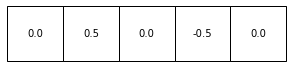

In [7]:
state_values = policy_eval(env = env_lecture, agent = agent_lecture, in_place = False, gamma = 0.9)
show_state_values(state_values)

Iterations: 174


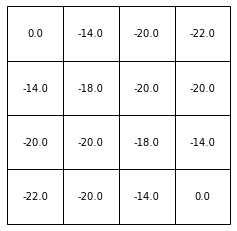

In [8]:
state_values = policy_eval(env = env_book, agent = agent_book, in_place = False, gamma = 1)
show_state_values(state_values)

---

## Iterative Solution - In Place

Iterations: 12


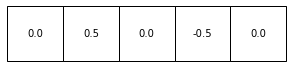

In [9]:
state_values = policy_eval(env = env_lecture, agent = agent_lecture, in_place = True, gamma = 0.9)
show_state_values(state_values)

Iterations: 115


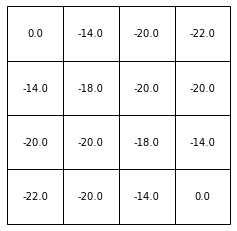

In [10]:
state_values = policy_eval(env = env_book, agent = agent_book, in_place = True, gamma = 1)
show_state_values(state_values)